# SHe - User survey analysis

## Test 1
### Hypothesis
- If customers expect more features, they would expect to pay more accordingly.

#### Questions:
- Is there a relationship between the nb of requested features and the price willing to be paid?
- Are certain features driving the price up?

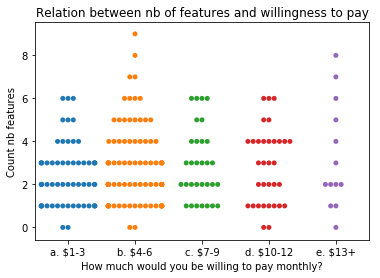

In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
from os import chdir
import matplotlib as plt

chdir('/Users/jonathanbeaulieu/Desktop/Data_processing')

df = pd.read_csv('_Input/E-bike_OEM_Validation_Merged_Dataset - FeatureCount_VS_Dollars.csv')
#df.columns

df_sort = df.sort_values(by=['14b. How much would you be willing to pay monthly?'])
#df_sort.head(30)

_ = sns.swarmplot(x='14b. How much would you be willing to pay monthly?', y='Count nb features', data=df_sort)
#_ = sns.boxplot(x='14b. How much would you be willing to pay monthly?', y='Count nb features', data=df_sort, saturation=.1, linewidth=.2)
_ = plt.pyplot.xlabel('How much would you be willing to pay monthly?')
_ = plt.pyplot.title('Relation between nb of features and willingness to pay')
#plt.show()


### Results
Swarmplot graph clearly shows that:
- below 6\$ per month, surveyed population seems to be expecting 1 to 3 features for their subscription.
- Above 13\$ per month, surveyed population mildly seams to be expecting 2 features for their subscription.
- For some unknowed reasons, their seams to be a separation in sampled population willing to pay 7 to 12 per month. Separation is most noticeable in the 10-12\$ category

**Hypothese is thus rejected.**

### Discussion
The uneven distribution in the 7 to 12 population could lead us to believe that some segmentation happens in that category. This segmentation could be based on the hypothesis that:
1. Some features are more important to some people.
    Who are those people? 
    What drives the difference?
    What are those important features?
2. Higher end customers that bought more expansive bikes are expecting more builtin features.
3. Perception difference of technology value and usage based on generation (age group).

## Test 2
### Hypothesis
- Some features are more praised than other and those are driving the expected features bundles price up.

#### Question:
- Are certain features driving the price up?
- If so, which one (hottest) are?
- And what is their money value?

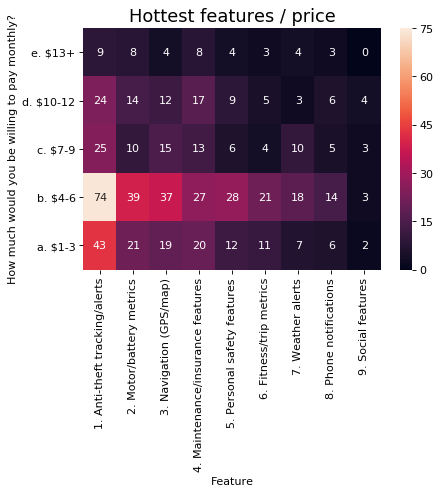

In [180]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

df = pd.read_csv('_Input/E-bike_OEM_Validation_Merged_Dataset - FeatureImportance_VS_Dollars.csv')
df = df.pivot('How much would you be willing to pay monthly?', 'Feature', 'Count')
df = df.sort_values(by=['How much would you be willing to pay monthly?'], ascending=False)
#print(df.columns)
#print(df.head())

_ = sns.heatmap(df, annot=True, vmax=75)
_ = plt.pyplot.title("Hottest features / price", fontsize=16, fontweight=5)


## Test 3
### Hypothesis 1
Some features are more important to some people.
### Hypothesis 2
Higher demanded features like Anti-theft and Nav appeals more to higher end customers.

### Questions
- Who are those people? 
- What drives the difference? 
- What are those important features?
- How does buying intentions distributes within each feature slice?
- Is there an overall pattern?

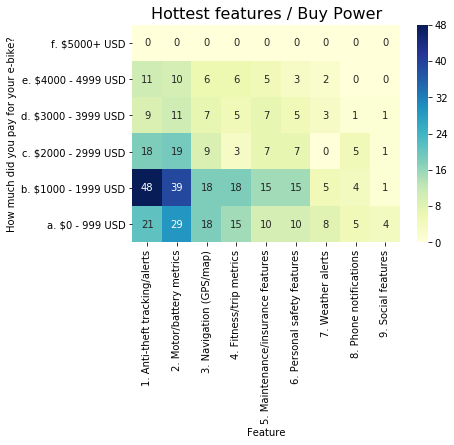

In [182]:
df = pd.read_csv('_Input/E-bike_OEM_Validation_Merged_Dataset - FeatureImportance_VS_BuyingPower.csv')
df = df.pivot("How much did you pay for your e-bike?", 'Feature', 'Count')
df = df.sort_values(by=["How much did you pay for your e-bike?"], ascending=False)
#print(df.columns)
#print(df.head())

_ = sns.heatmap(df, annot=True, cmap="YlGnBu")
_ = plt.pyplot.title("Hottest features / Buy Power", fontsize=16, fontweight=5)

### Warning
This graph could lead to biased decision.
Hot spot location is mostly related to this group of buyers being more represented in the population.
Although it shows where the volume of interest is (absolute interest) , it doesn't tell anything about the buying intentions within the for each feature slice (relative interest).
For relative interest, look below.

Distribution of payable feature by buyers group


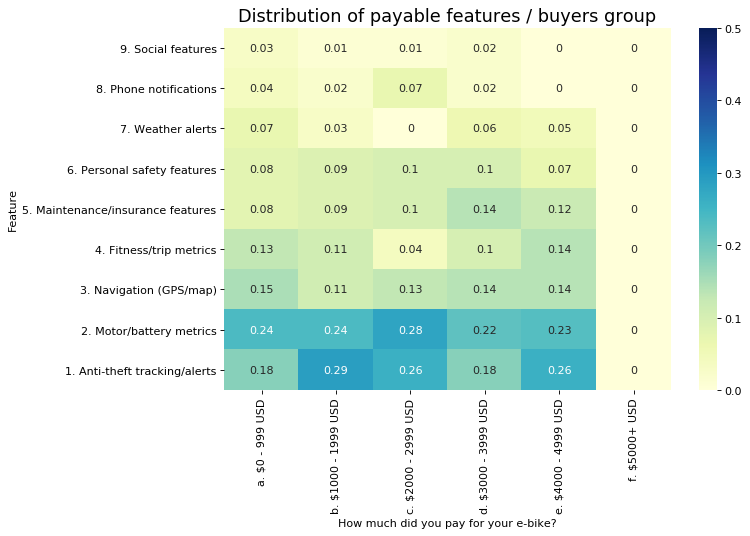

In [179]:
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')

df = pd.read_csv('_Input/E-bike_OEM_Validation_Merged_Dataset - FeatImp_VS_BuyingPower_%.csv')
df.drop('Count', 1, inplace=True)
df.drop('Total_BuyerGroup', 1, inplace=True)

#df = df.pivot("How much did you pay for your e-bike?", 'Feature', '%_from_BuyerGroup')
df = df.pivot('Feature', "How much did you pay for your e-bike?", '%_from_BuyerGroup')
df = df.sort_values(by=['Feature'], ascending=False)

print('Distribution of payable feature by buyers group')
_ = sns.heatmap(df, annot=True, cmap="YlGnBu", vmax=.5)
_ = plt.pyplot.title("Distribution of payable features / buyers group", fontsize=16, fontweight=5)


### Results
Heatmap graph reveals that:
- 'Anti-thieft tracking / alert' interest more higher end buyer groups between 4-5k AND entry/mid-level buyer group between 1-3k USD. 
- Interest in the 'Mortor/battery metric' feature is quite high and fairly evenly distributed between buyer groups. 
- Interest in the 'Navigation' feature is also fairly evenly distributed between buyer groups but significantly lower  then 'Anti-Thief' and 'M/b metrics'.
- Interest in 'Fitness/trip metrics' feature is comparable to 'Navigation', but as inversed bell curve distribution which means that mid-level buyers are somewhat less interested in this feature family.
- Interest in 'Maintenance/insurance' feature family is comparable to 'Navigation', but with a peak amongst higher end buyers.
- Interest in 'Personnal safety' features is similar to 'Maintenance/insurance' feature family, but evenly distributed.
- Interest pattern in 'Weather alert' is similar to 'Fitness/t metrics', but with less magnetude.



**Hypothesys 1** (Some features are more important to some people.) **is thus validated**
Anti-thief, Fitness/trip, Maintenance/i, Weather alerts and Phone notifications all show clear patterns to support that hypothesys.

**Hypothesys 2** (Higher demanded features like Anti-thieft, Nav and M/b metrics appeals more to higher end customers.) **is thus rejected**
Interest in Motor/batt metrics is well distributed.


### Discussion
Considering that the top 6 feature set get bulk of the interest (X%) and that those are also were the buying will is, it could be well advised to focus our development efforts on those. Moreover 

Dig deeping to discover what is specifically expected in 'M/b metric' family.
Why is 'Anti-thief' less interesting to 3-4k slice compared with the rest. Or why are feature set 2 to 6 more intesting to 3-4k slice compared to others.

Bining bias could be an issue here in categorizing the buyers group.

## Test 4
### Hypothesis
Higher end customers that bought more expansive bikes will spend more on monthly subscription.

### Questions
In which price slide goes spending intentions for each buyers group? Relatively and Absolutely.




              BuyerGroup      Dwill  Count
0       a. $0 - 999 USD    a. $1-3     10
1       a. $0 - 999 USD    b. $4-6     14
2       a. $0 - 999 USD    c. $7-9      6
3       a. $0 - 999 USD  d. $10-12      5
4       a. $0 - 999 USD    e. $13+      3
5   b. $1000 - 1999 USD    a. $1-3     17
6   b. $1000 - 1999 USD    b. $4-6     38
7   b. $1000 - 1999 USD    c. $7-9     14
8   b. $1000 - 1999 USD  d. $10-12     14
9   b. $1000 - 1999 USD    e. $13+      4
10  c. $2000 - 2999 USD    a. $1-3     13
11  c. $2000 - 2999 USD    b. $4-6     15
12  c. $2000 - 2999 USD    c. $7-9      6
13  c. $2000 - 2999 USD  d. $10-12      6
14  c. $2000 - 2999 USD    e. $13+      3
15  d. $3000 - 3999 USD    a. $1-3      5
16  d. $3000 - 3999 USD    b. $4-6      8
17  d. $3000 - 3999 USD    c. $7-9      1
18  d. $3000 - 3999 USD  d. $10-12      4
19  d. $3000 - 3999 USD    e. $13+      1
20  e. $4000 - 4999 USD    a. $1-3     13
21  e. $4000 - 4999 USD    b. $4-6     17
22  e. $4000 - 4999 USD    c. $7

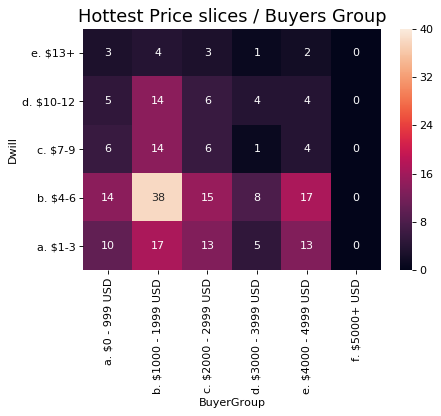

In [431]:
df_raw = pd.read_csv('_Input/E-bike_OEM_Validation_Merged_Dataset - Dwill_VS_BuyerGroup.csv')
df = df_raw[df_raw.Dwill.notnull()]

# Define lists to be put in relation
ls_Dwill = ["a. $1-3", "b. $4-6", "c. $7-9", "d. $10-12", "e. $13+"]
ls_BuyerGroups = ["a. $0 - 999 USD", "b. $1000 - 1999 USD", "c. $2000 - 2999 USD", "d. $3000 - 3999 USD", "e. $4000 - 4999 USD", "f. $5000+ USD"]
list_keys = ['BuyerGroup', 'Dwill', 'Count']

# Initiate empty lists.
list_value_A = [] # In this case, Dwill value list
list_value_B = [] # In this case, BuyerGroup value list
list_value_Count = [] 

def relmatrix(df, list1, list2):
    """DOC STRING
    Takes a Pandas Dataframe and 2 lists as argument and check returns a long tidy dataset of 
    the count of all occurance for all possible combinaisons between the two lists."""
    
    __df = df
    
    for i in list1:
        Serie_Dw_check = __df.loc[:,list_keys[0]] == i
        for j in list2:
            Serie_BG_check = __df.loc[:,list_keys[1]] == j
            df_temp = pd.concat([Serie_BG_check, Serie_Dw_check], axis=1) # Concat Series horizontally
            col_temp = df_temp.all(axis=1) # Return whether all elements are True over series or dataframe axis. Adding axis=1 argument will check if row-wise values all return True.
            count = col_temp[col_temp == True].count() # Returns nb of True

            list_value_A.append(i)
            list_value_B.append(j)
            list_value_Count.append(count)

    list_values = [list_value_A, list_value_B, list_value_Count]

    zipped = zip(list_keys, list_values)
    data = dict(zipped)
    df_f = pd.DataFrame(data)
    return df_f

df_final = relmatrix(df, ls_BuyerGroups, ls_Dwill)

print( '\n', df_final)
print('Total of all respondents: ',df_final.loc[:,'Count'].sum())
#df_final.to_csv('Dwill_VS_BuyerGroup2.csv')

df_final = df_final.pivot('Dwill', 'BuyerGroup', 'Count')
df_final = df_final.sort_values(by=['Dwill'], ascending=False)
#print(df_final)

figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
_ = sns.heatmap(df_final, annot=True, vmax=40)
_ = plt.pyplot.title("Hottest Price slices / Buyers Group", fontsize=16, fontweight=5)




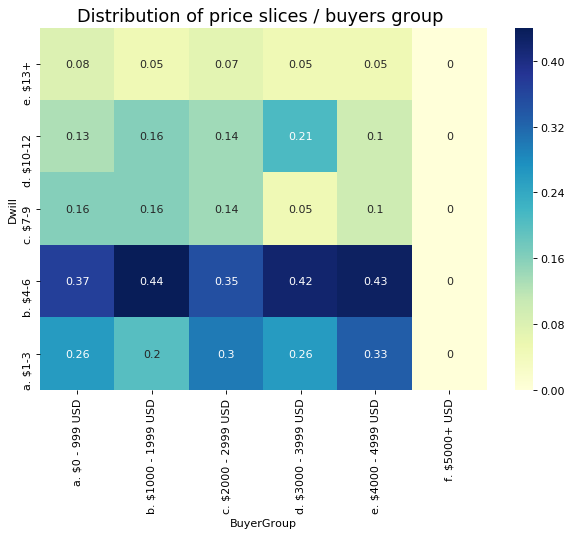

In [437]:
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')

df = pd.read_csv('_Input/E-bike_OEM_Validation_Merged_Dataset - Dwill_VS_BuyerGroup2.csv')
df.drop('Count', 1, inplace=True)
df.drop('Total_BuyerGroup', 1, inplace=True)
#print(df)

df = df.pivot("Dwill", 'BuyerGroup', '%_from_Dwill')
df_final = df.sort_values(by=['Dwill'], ascending=False)

_ = sns.heatmap(df_final, annot=True, cmap="YlGnBu", vmax=.44)
_ = plt.pyplot.title("Distribution of price slices / buyers group ", fontsize=16, fontweight=5)



### Results
Heatmap graph reveals that:
- Bulk of the spending intentions are between 1 and 6 USD (between 63 and 76% of all buyers group).
- 40% of respondents are in the 4-6 USD slice with sharp peek (42% of the slice) in the 1-2k USD buyer group.
- This same slice shows mild relative in spending more on subscription which translate in some absolute volume.
- Interesting to point out a mild peek at 10-12 USD slice in 3-4k USD buyer group due to sampling spreading thing (n=4) at this data point, it's probably not statistically significant.

**Hypothesis 1** (Higher end customers that bought more expansive bikes will spend more on monthly subscription.) **is thus rejected**

Actually, results shows the exact opposite.

### Discussion
Results could be explained by the fact that higher end products generally comes fully equipped with accessories and cutting edge tech. Lower end buyers could be more inclined to spend of more 'à la carte' features. Our feature set would then be considered "bonus features".


In [434]:
# Unfinished code trying to return same result as 'E-bike_OEM_Validation_Merged_Dataset - Dwill_VS_BuyerGroup2.csv'

df_raw = pd.read_csv('_Input/E-bike_OEM_Validation_Merged_Dataset - Dwill_VS_BuyerGroup.csv')
df = df_raw[df_raw.Dwill.notnull()]

# Define lists to be put in relation
ls_Dwill = ["a. $1-3", "b. $4-6", "c. $7-9", "d. $10-12", "e. $13+"]
ls_BuyerGroups = ["a. $0 - 999 USD", "b. $1000 - 1999 USD", "c. $2000 - 2999 USD", "d. $3000 - 3999 USD", "e. $4000 - 4999 USD", "f. $5000+ USD"]
list_keys = ['Dwill', 'BuyerGroup', 'Count']

# Initiate empty lists.
list_value_A = [] # In this case, Dwill value list
list_value_B = [] # In this case, BuyerGroup value list
list_value_Count = [] 

df_final = relmatrix(df, ls_Dwill, ls_BuyerGroups)

df2 = df_final.groupby(by='Dwill').sum()
print(df2)

#print(df_final.iloc[0,0])
#print(ls_Dwill[0])
#print(df_final.iloc[0,0] == ls_Dwill[0] )
#print(df2[0,0])
#print(df_final.iloc[0,2])    

"""ls_temp = []
x = 0
y = 0
for i in df_final['Dwill']:    
    while i == ls_Dwill[x]:
        z = df_final.iloc[y,2]/df2.iloc[x,0]
        ls_temp.append(z)
        y += 1
    x += 1

print(ls_temp)"""

#print( '\n', df_final)
df_final.to_csv('Dwill_VS_BuyerGroup2.csv')
#print('Total of all respondents: ',df_final.loc[:,'Count'].sum())

df_final = df_final.pivot('Dwill', 'BuyerGroup', 'Count')
df_final = df_final.sort_values(by=['Dwill'], ascending=False)

#figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
#_ = sns.heatmap(df_final, annot=True, vmax=40)
#_ = plt.pyplot.title("Hottest Buyers Group / price", fontsize=16, fontweight=5)

           Count
Dwill           
a. $1-3       58
b. $4-6       92
c. $7-9       31
d. $10-12     33
e. $13+       13


In [433]:
# Code dump

"""def combine(list1, list2):
    # DOC STRING
    #Concatenate all items from one list to another to return a list of all ordered possible combinations.
    
    ls_temp=[]
    x = 0
    for j in list1:
        for i in list2:
            item = j + i
            ls_temp.append(item)
    return list(ls_temp)

ls_combine = combine(ls_Dwill, ls_BuyerGroups)"""

'def combine(list1, list2):\n    # DOC STRING\n    #Concatenate all items from one list to another to return a list of all ordered possible combinations.\n    \n    ls_temp=[]\n    x = 0\n    for j in list1:\n        for i in list2:\n            item = j + i\n            ls_temp.append(item)\n    return list(ls_temp)\n\nls_combine = combine(ls_Dwill, ls_BuyerGroups)'

In [188]:
ls_Dwill = ("a. $1-3", "b. $4-6", "c. $7-9", "d. $10-12", "e. $13+")
ls_BuyerGroups = ("a. $0 - 999 USD", "b. $1000 - 1999 USD", "c. $2000 - 2999 USD", "d. $3000 - 3999 USD", "e. $4000 - 4999 USD", "f. $5000+ USD")

#for i in ls_Dwill:
test = zip(ls_Dwill[0], ls_BuyerGroups)
print(list(test))

[('a', 'a. $0 - 999 USD'), ('.', 'b. $1000 - 1999 USD'), (' ', 'c. $2000 - 2999 USD'), ('$', 'd. $3000 - 3999 USD'), ('1', 'e. $4000 - 4999 USD'), ('-', 'f. $5000+ USD')]
